In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'https://raw.githubusercontent.com/selva86/datasets/master/a10.csv'

df = pd.read_csv(file_path , parse_dates=['date'] , index_col='date')
df.tail()

,value
date,
2008-02-01,21.654285
2008-03-01,18.264945
2008-04-01,23.107677
2008-05-01,22.912510
2008-06-01,19.431740


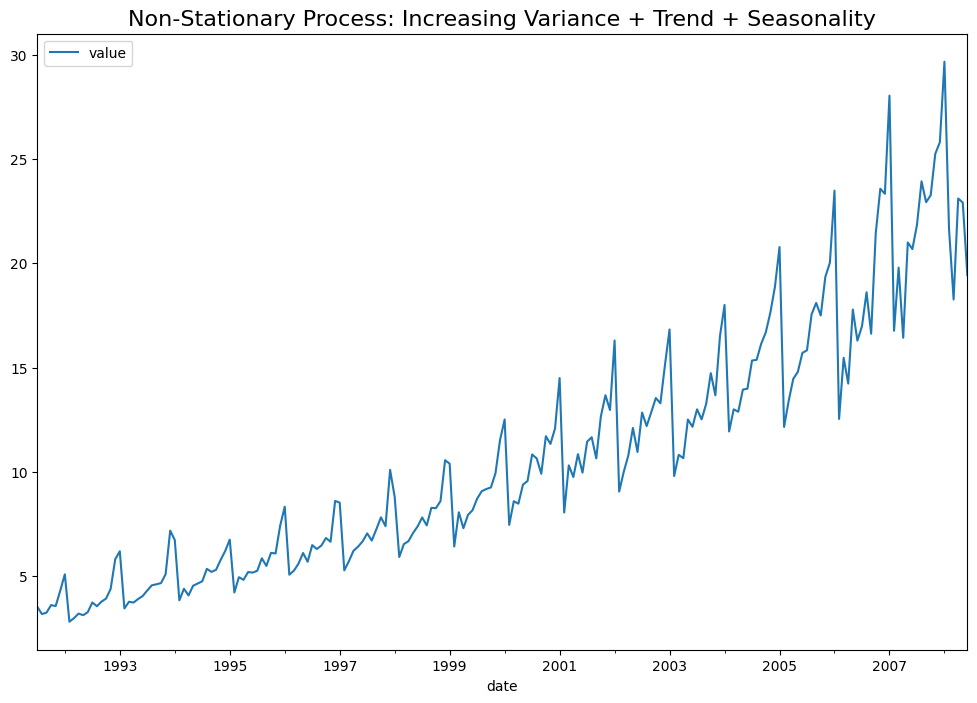

In [24]:
df.plot(figsize=[12, 8])
plt.title('Non-Stationary Process: Increasing Variance + Trend + Seasonality', fontsize=16)
plt.show()

In [25]:
from statsmodels.tsa.stattools import adfuller

## ADF
def ADF(data):

    result = adfuller(data, autolag="AIC")

    print("---- Adfuller ----")
    print('ADF Statistic: %f' % result[0])
    print('p-value: %1.10f' % result[1])
    print('Lag: %d' % result[2])
    print('observation: %d' % result[3])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))


In [26]:
import numpy as np

df_vst = np.log(df.value)
df_vst.head()

date
1991-07-01    1.260332
1991-08-01    1.157161
1991-09-01    1.179338
1991-10-01    1.283986
1991-11-01    1.271408
Name: value, dtype: float64

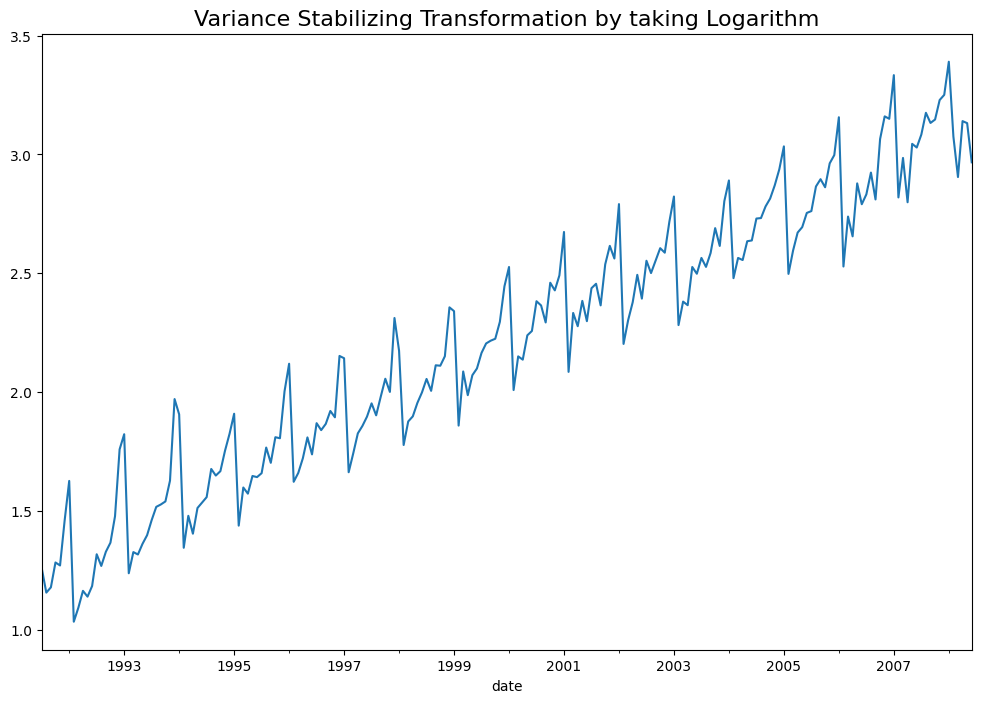

In [27]:
df_vst.plot(figsize=(12,8))
plt.title("Variance Stabilizing Transformation by taking Logarithm", fontsize=16)
plt.show()

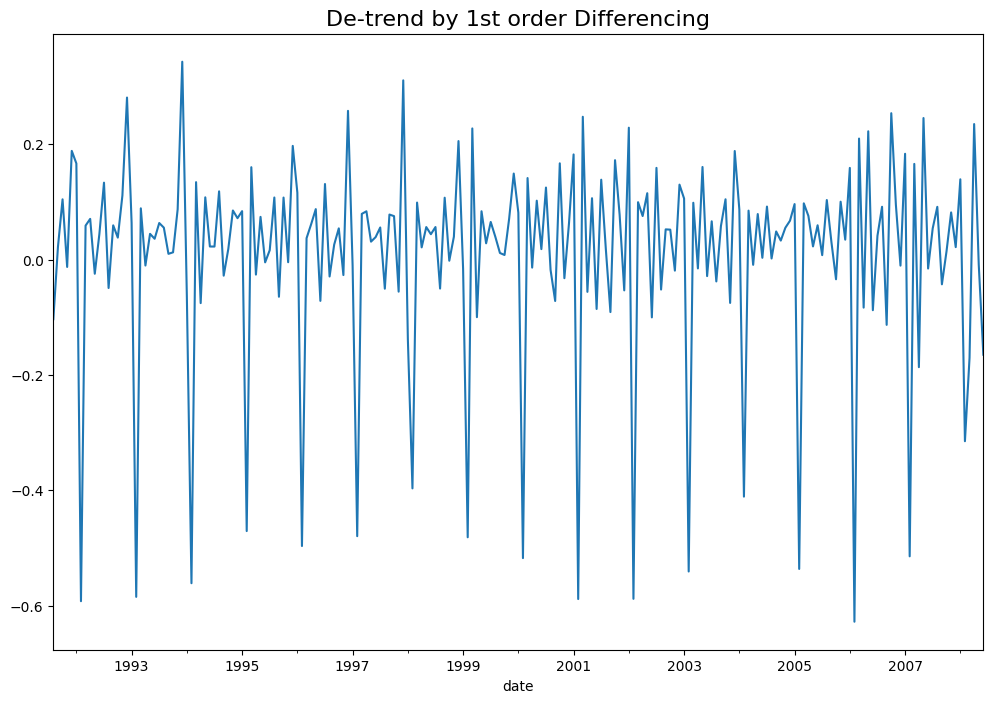

In [28]:
### De-trand by Differencing
df_vst_diff1 = df_vst.diff(1).dropna()
df_vst_diff1
plt.figure(figsize=(12,8))
df_vst_diff1.plot()
plt.title("De-trend by 1st order Differencing", fontsize=16) 
plt.show()

In [29]:
# 차분, timelag : 12 계절성 제거
df_vst_diff1.diff(2).isnull().sum()

2

In [32]:
## Stationary Process: De-seasonality by Seasonal Differencing
df_vst_diff1_diff12 = df_vst_diff1.diff(12).dropna()

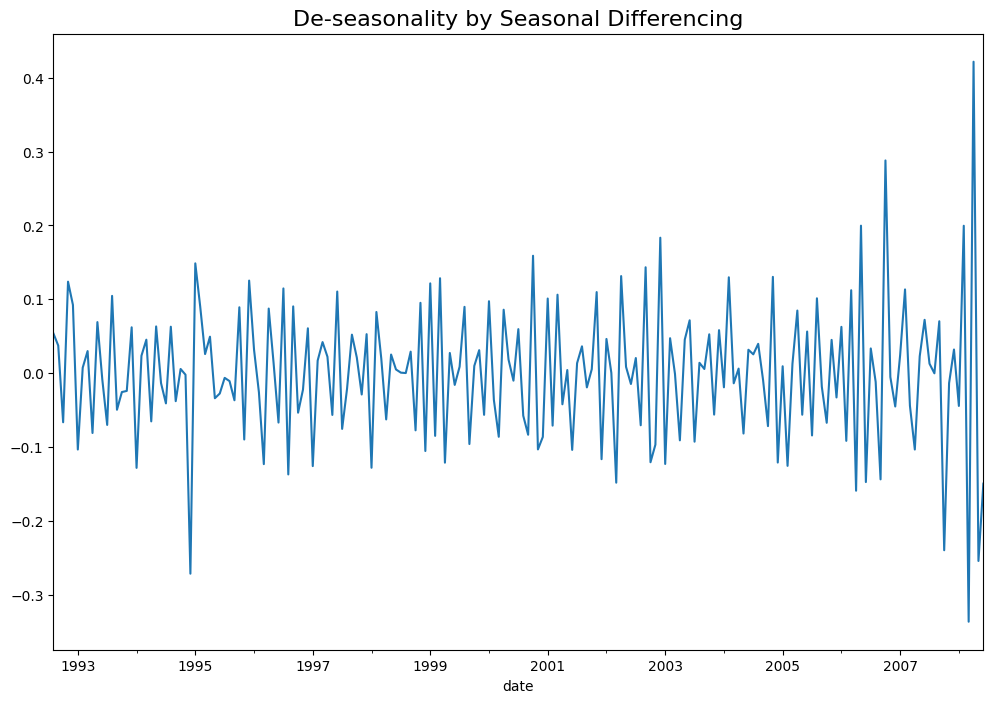

In [33]:
## plotting
plt.figure(figsize=(12,8))
df_vst_diff1_diff12.plot()
plt.title("De-seasonality by Seasonal Differencing", fontsize=16) 
plt.show()

In [34]:
ADF(df_vst_diff1_diff12)

---- Adfuller ----
ADF Statistic: -4.785546
p-value: 0.0000579565
Lag: 13
observation: 177
Critical Values:
	1%: -3.468
	5%: -2.878
	10%: -2.576
